# Supply-Chain-Shipping-Data-Analysis

### Data Import and Preprocessing

In [183]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [184]:
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SCMS_Delivery_History_Dataset.csv")

In [185]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [187]:
df.shape

(10324, 33)

In [188]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
Molecule/Test Type                 0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Vendor                             0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
Freight Cost (USD)                 0
Item Description                   0
ID                                 0
Project Code                       0
Product Group                      0
Delivery Recorded Date             0
Delivered to Client Date           0
Scheduled Delivery Date            0
PO Sent to Vendor Date             0
PQ First Sent to Client Date       0
Vendor INCO Term                   0
Fulfill Via                        0
M

In [189]:
# % of missing values
(df.isnull().mean()*100).sort_values(ascending=False)

Dosage                          16.815188
Shipment Mode                    3.487021
Line Item Insurance (USD)        2.779930
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0.000000
Line Item Quantity               0.000000
Line Item Value                  0.000000
Vendor                           0.000000
Pack Price                       0.000000
Unit Price                       0.000000
Manufacturing Site               0.000000
First Line Designation           0.000000
Weight (Kilograms)               0.000000
Freight Cost (USD)               0.000000
Item Description                 0.000000
ID                               0.000000
Project Code                     0.000000
Product Group                    0.000000
Delivery Recorded Date           0.000000
Delivered to Client Date         0.000000
Scheduled Delivery Date          0.000000
PO Sent to Vendor Date           0

In [190]:
# drop null values
df = df.dropna()

In [191]:
df.nunique()

ID                              8158
Project Code                      90
PQ #                             877
PO / SO #                       4750
ASN/DN #                        5242
Country                           34
Managed By                         2
Fulfill Via                        2
Vendor INCO Term                   7
Shipment Mode                      4
PQ First Sent to Client Date     581
PO Sent to Vendor Date           565
Scheduled Delivery Date         1630
Delivered to Client Date        1743
Delivery Recorded Date          1676
Product Group                      3
Sub Classification                 4
Vendor                            42
Item Description                 136
Molecule/Test Type                41
Brand                             25
Dosage                            53
Dosage Form                       15
Unit of Measure (Per Pack)        21
Line Item Quantity              4487
Line Item Value                 7404
Pack Price                      1042
U

In [192]:
col_1=['Managed By','Fulfill Via','Vendor INCO Term','Shipment Mode','Product Group','Sub Classification','First Line Designation']
for x in col_1:
    print(df[x].value_counts())
    print('-----------------------------------------------------------\n')

Managed By
PMO - US                     8101
South Africa Field Office      57
Name: count, dtype: int64
-----------------------------------------------------------

Fulfill Via
From RDC       4905
Direct Drop    3253
Name: count, dtype: int64
-----------------------------------------------------------

Vendor INCO Term
N/A - From RDC    4905
DDP               1379
EXW               1241
FCA                383
CIP                237
DDU                  8
DAP                  5
Name: count, dtype: int64
-----------------------------------------------------------

Shipment Mode
Air            4361
Truck          2780
Air Charter     650
Ocean           367
Name: count, dtype: int64
-----------------------------------------------------------

Product Group
ARV     8120
ANTM      22
ACT       16
Name: count, dtype: int64
-----------------------------------------------------------

Sub Classification
Adult        6266
Pediatric    1854
Malaria        22
ACT            16
Name: count, dtype

In [193]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [195]:
# Statistical Details of numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8158.0,56644.616573,31253.921647,108.0,21990.25,73486.000,84306.7500,86823.00
Unit of Measure (Per Pack),8158.0,80.203972,81.296579,5.0,30.00,60.000,60.0000,1000.00
Line Item Quantity,8158.0,22091.348492,43990.580533,1.0,560.00,4427.500,24096.7500,619999.00
Line Item Value,8158.0,167023.722442,375812.941163,0.0,4221.86,29343.000,164092.6700,5951990.40
Pack Price,8158.0,12.408811,17.059437,0.0,3.50,7.645,13.2475,306.88
Unit Price,8158.0,0.212851,0.285822,0.0,0.06,0.140,0.2600,14.04
Line Item Insurance (USD),8158.0,251.326639,536.131657,0.0,6.50,45.545,239.7575,7708.44


In [196]:
#Statistical Details of categorical Columns
str_cols=df.select_dtypes("object").columns
df[str_cols].describe().T

,count,unique,top,freq
Project Code,8158,90,116-ZA-T30,768
PQ #,8158,877,Pre-PQ Process,1693
PO / SO #,8158,4750,SCMS-199289,67
ASN/DN #,8158,5242,ASN-19166,54
Country,8158,34,South Africa,1364
Managed By,8158,2,PMO - US,8101
Fulfill Via,8158,2,From RDC,4905
Vendor INCO Term,8158,7,N/A - From RDC,4905
Shipment Mode,8158,4,Air,4361
PQ First Sent to Client Date,8158,581,Pre-PQ Process,1488


In [197]:
data=df.Country.value_counts().head(10).reset_index()
data

,Country,count
0,South Africa,1364
1,Nigeria,952
2,Côte d'Ivoire,827
3,Uganda,724
4,Vietnam,661
5,Haiti,549
6,Mozambique,506
7,Zimbabwe,471
8,Zambia,470
9,Tanzania,374


Text(0.5, 1.0, 'Top 10 Countries')

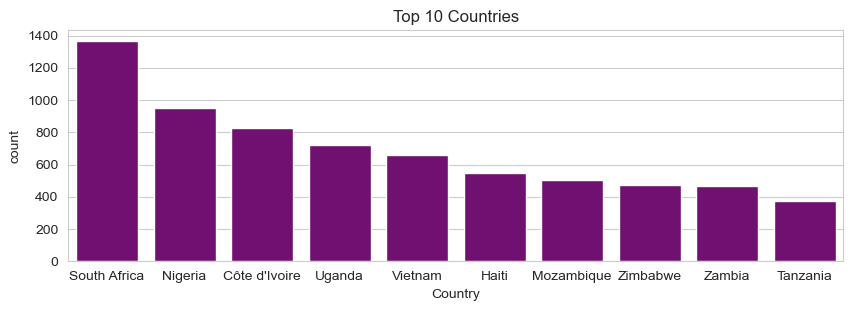

In [198]:
# Top 10 Countries
plt.figure(figsize=(10,3))
sns.barplot(data,x='Country',y='count',color='purple') 
plt.title('Top 10 Countries')
#plt.savefig("Top 10 Countries")

* Dominance of South Africa: South Africa stands out as the country with the highest count, significantly surpassing the others.
* Close Ranks: Nigeria and Côte d'Ivoire follow closely behind South Africa, indicating a relatively competitive landscape.
* Cluster of African Nations: The majority of countries represented are African, suggesting the data is likely related to a specific context within the African continent.
* Vietnam's Presence: The inclusion of Vietnam adds an international dimension to the graph, potentially indicating global trends or connections.
* Haiti and Mozambique: These two countries appear to be at the lower end of the ranking, suggesting they may have lower counts or different factors influencing their position.

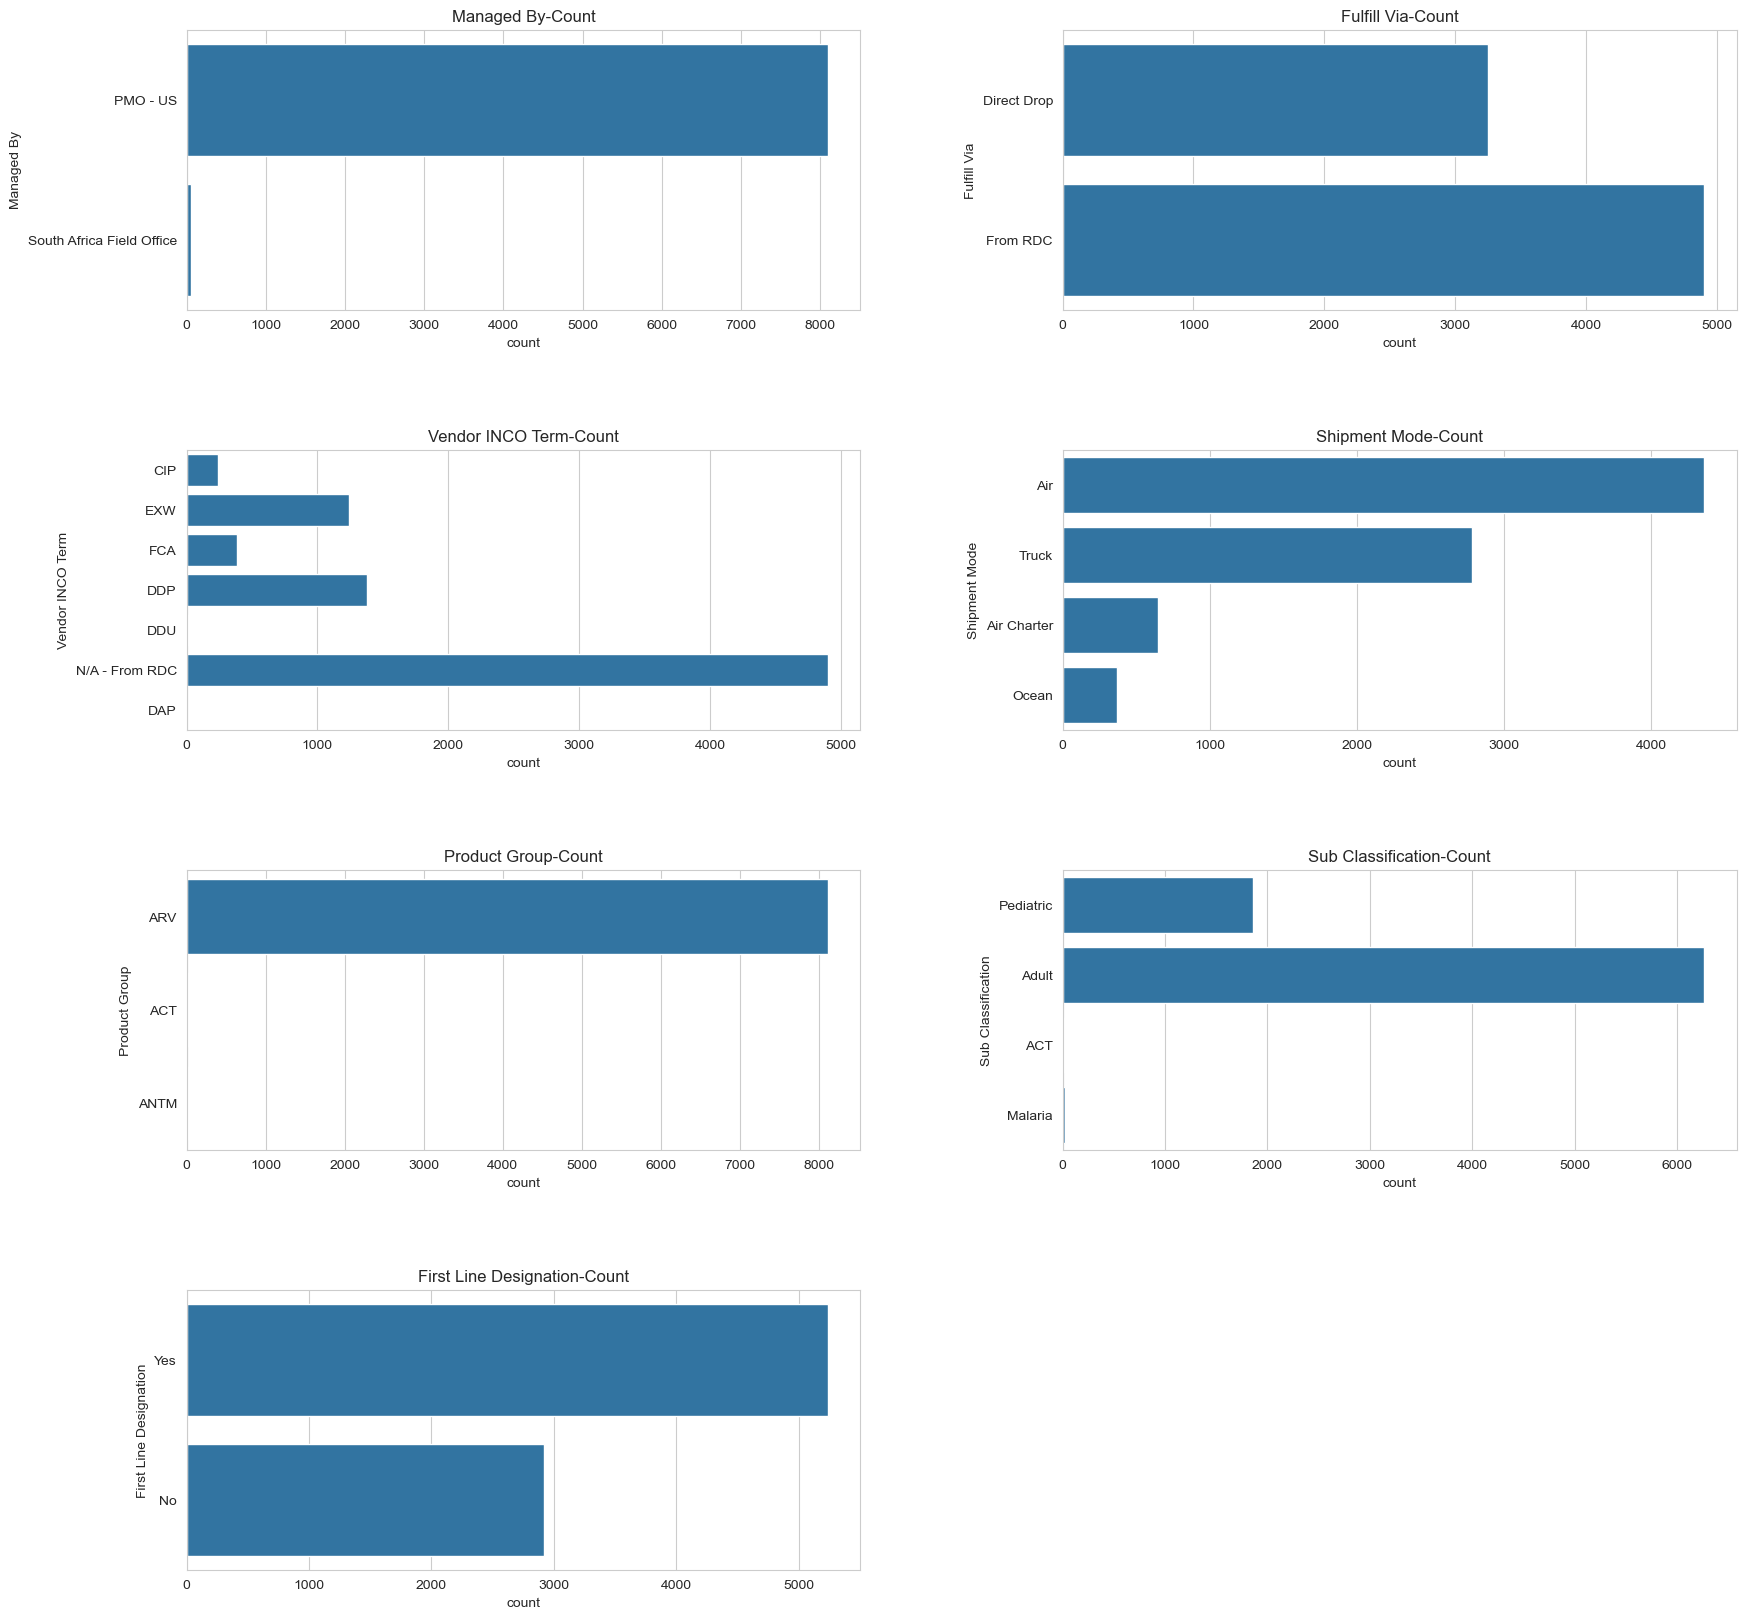

In [200]:
# categorivcal var analysis
plt.figure(figsize=(20,20))
count=1
for x in col_1:
    plt.subplot(4,2,count)
    plt.title(f'{x}-Count')
    sns.countplot(data=df,y=df[x])
    count+=1
# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust as needed
#plt.savefig('Category_var')
plt.show()    

**Managed By-Count:**
* Dominance of PMO US: The "PMO US" category clearly dominates, suggesting it handles a significantly larger portion of the data.
* Smaller Contributions: Other categories, like "Fram RDC" and "Vendor INCO Term," have much smaller contributions.

**Fulfill Via-Count:**
* Dominance of Ocean: "Ocean" is the dominant category, indicating that most fulfillments are via ocean transportation.
* Smaller Contributions: "Air Charter" has a smaller contribution, suggesting it's used less frequently.

**Vendor INCO Term-Count:**
* Dominance of N/A-From RDC: This category has the highest count, suggesting it's the most common vendor INCO term.
* Other Terms: "DA" and "DO" have smaller counts, indicating less frequent use.

**Shipment Mode-Count:**
* Dominance of Ocean: Similar to "Fulfill Via-Count," "Ocean" is the dominant category.
* Smaller Contribution: "Air Charter" has a smaller contribution.

**Product Group-Count:**
* Dominance of ARY: "ARY" is the dominant category, suggesting it's the most common product group.
* Other Groups: "ANTM" and "Malana" have smaller counts.

**Sub Classification-Count:**
* Dominance of Ad: "Ad" is the dominant category, indicating it's the most common sub-classification.
* Other Classifications: "ANTM" and "Malana" have smaller counts.

**First Line Designation-Count:**
* Dominance of Yes: "Yes" is the dominant category, suggesting it's the most common first-line designation.
* Smaller Contribution: "No" has a smaller count.

#### Possible Interpretations

* Data Focus: The dominance of certain categories in several graphs suggests that the data may be focused on specific areas, such as ocean shipments, specific vendors, or particular product groups.
  
* Operational Efficiency: The distribution of data in graphs like "Fulfill Via-Count" and "Shipment Mode-Count" could provide insights into operational efficiency and the effectiveness of different transportation methods.

* Strategic Focus: The dominance of certain categories in "Product Group-Count" and "Sub Classification-Count" might indicate strategic areas of focus or areas with higher demand.



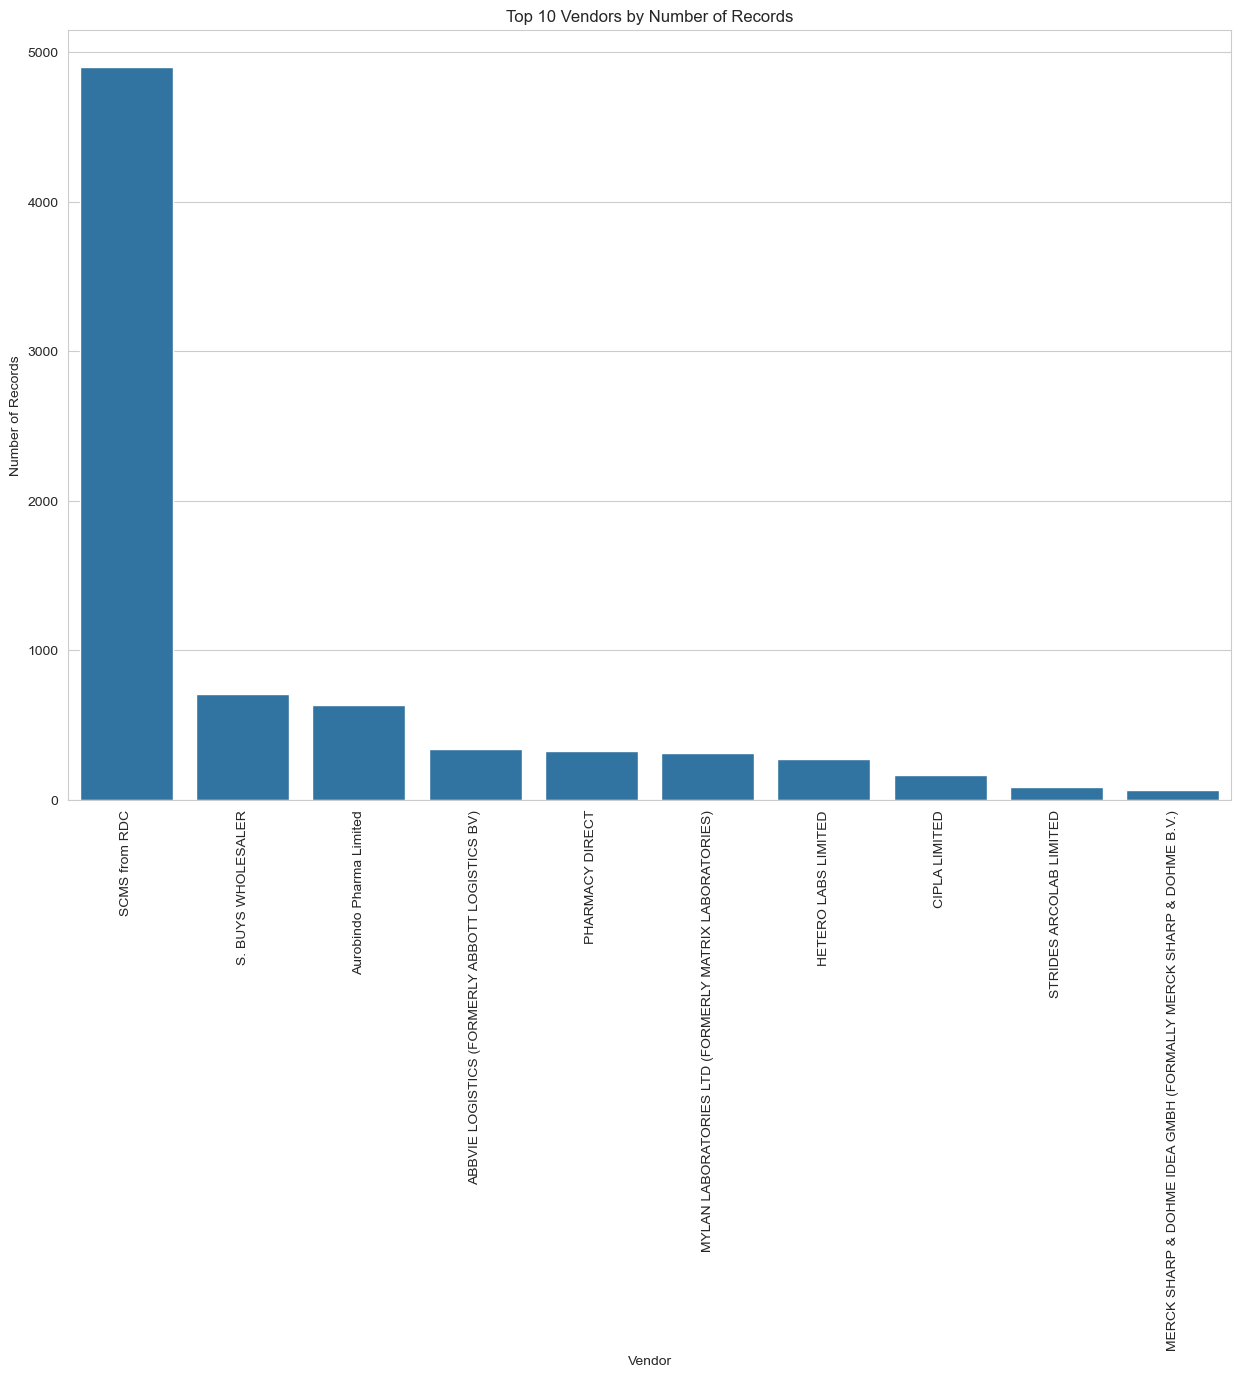

In [203]:
# Top 10 vendors by the number of records
plt.figure(figsize=(15,10))
top_vendors = df['Vendor'].value_counts().nlargest(10)
sns.barplot(x=top_vendors.index, y=top_vendors.values)
plt.title('Top 10 Vendors by Number of Records')
plt.ylabel('Number of Records')
plt.xlabel('Vendor')
plt.xticks(rotation=90)
plt.show()

#### Key Observations:
* Dominance of SCMS from RDC: CMS from RDC stands out as the vendor with the highest number of records, significantly outperforming the others.
* Steep Decline: The number of records for subsequent vendors drops off sharply, indicating a significant concentration of records in the top-ranked vendor.
* Cluster of Vendors: The majority of vendors appear to be related to the pharmaceutical or healthcare industry, as evidenced by names like "Pharma Limited," "Pharmacy Direct," and "LABORATORIES)."
* Limited Variation: The bars for the lower-ranked vendors are relatively similar in height, suggesting a lack of significant differences in their number of records.

#### Possible Interpretations:
* Data Concentration: The dominance of SCMS from RDC suggests that a significant portion of the data is associated with this vendor, potentially due to factors such as:
    * Data Collection Practices: SCMS from RDC may have more comprehensive or efficient data collection methods.
    * Business Size or Scope: The vendor might be larger or operate in a broader market segment, leading to a higher volume of records.
    * Data Retention Policies: SCMS from RDC may have different data retention policies, resulting in a larger accumulation of records.
* Vendor Relationships: The clustering of pharmaceutical and healthcare vendors could indicate a strong focus on this industry or specific business relationships within the sector.
* Data Quality or Completeness: The limited variation among lower-ranked vendors might suggest potential data quality issues or inconsistencies in data reporting.

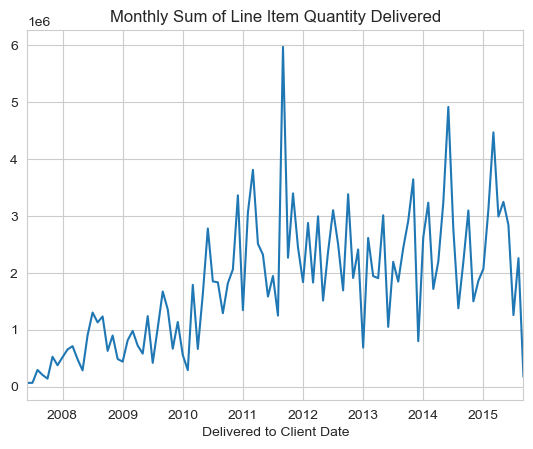

In [205]:
# Convert date columns to datetime format
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

# Time series analysis on delivery dates
df.set_index('Delivered to Client Date')['Line Item Quantity'].resample('M').sum().plot()
plt.title('Monthly Sum of Line Item Quantity Delivered')
plt.show()

#### Key Observations:
* Trend Over Time: The graph shows a general upward trend in the monthly sum of line item quantity delivered from 2008 to 2011.
* Peak in 2011: The year 2011 saw a significant peak in deliveries, with the highest recorded quantity.
* Fluctuations After 2011: Following the peak in 2011, the quantity delivered fluctuated with both upward and downward trends, but overall, it remained relatively high compared to the earlier years.
* Decrease in 2015: In 2015, there was a noticeable decrease in the quantity delivered, suggesting a potential shift in demand or operational factors.

#### Possible Interpretations:
* Market Growth: The upward trend from 2008 to 2011 could indicate increasing market demand or business expansion.
* Seasonal Fluctuations: The fluctuations in the data might be influenced by seasonal factors or industry-specific trends.
* Economic Conditions: Economic factors, such as recessions or economic growth, could have impacted the demand for products or services.
* Operational Changes: Changes in operational factors, such as production capacity, supply chain disruptions, or pricing strategies, might have influenced the quantity delivered.

In [207]:
top_country=df.Country.value_counts().head(10).index
df_top_country=df[df.Country.isin(top_country)]

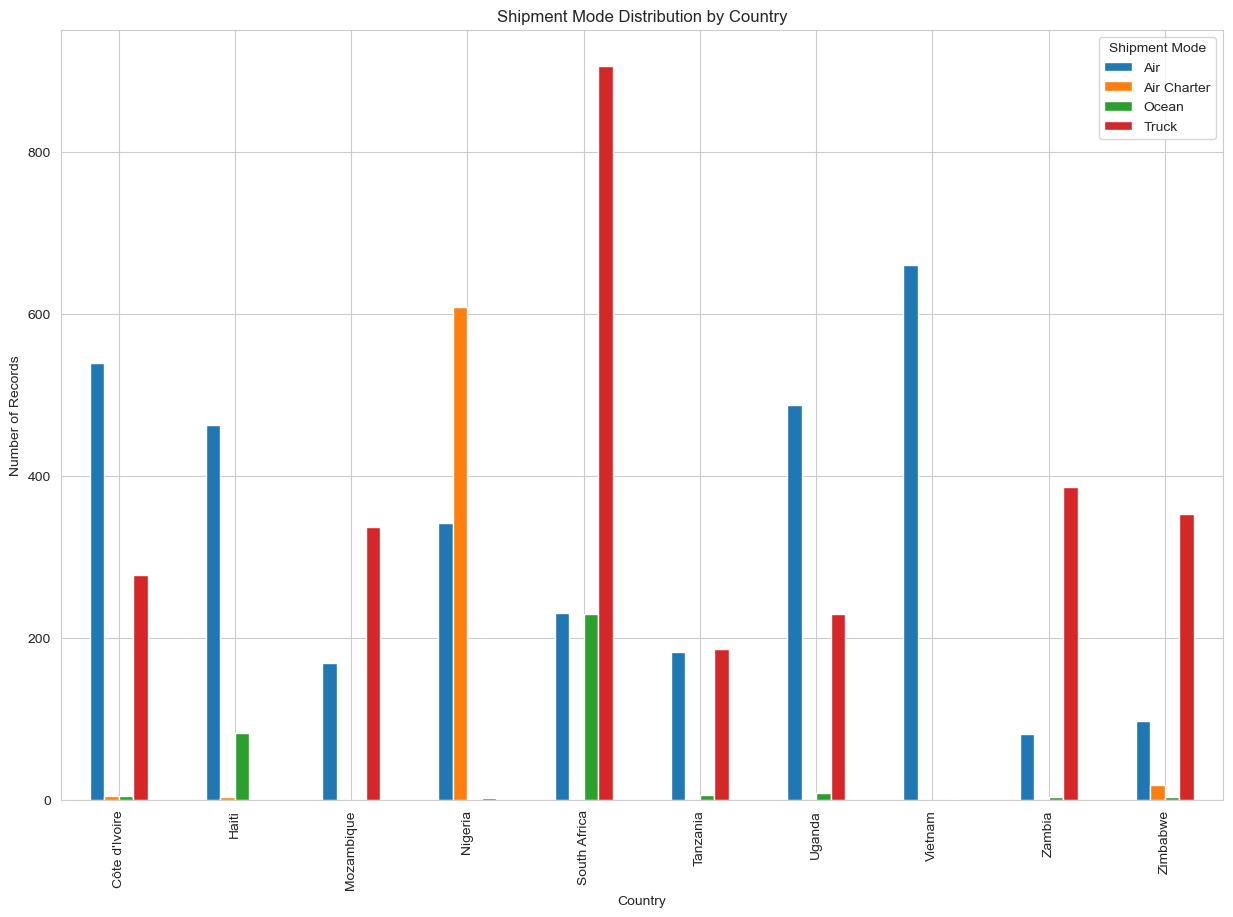

In [208]:
#  bar plot for 'Shipment Mode' by 'top_Country'
country_shipment_mode = pd.crosstab(df_top_country['Country'], df_top_country['Shipment Mode'])
country_shipment_mode.plot(kind='bar', figsize=(15,10))
plt.title('Shipment Mode Distribution by Country')
plt.ylabel('Number of Records')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

#### Key Observations:

**Dominance of Air and Truck:**
* Air: The most dominant mode across nearly all countries, indicating a strong preference for air transportation.
* Truck: Also widely used, particularly in countries like South Africa, Nigeria, and Mozambique.

**Limited Use of Ocean and Air Charter:**
* Ocean: Appears to be used in fewer countries and with lower volumes compared to air and truck.
* Air Charter: The least used mode, with minimal presence in most countries.

**Country-Specific Variations:**
* South Africa: Exhibits a diverse distribution, with significant volumes for all modes.
* Nigeria: Shows a strong preference for air and truck, with limited use of ocean and air charter.
* Mozambique: Similar to Nigeria, with air and truck being the primary modes.
* Côte d'Ivoire, Haiti, and Tanzania: Have relatively lower overall shipment volumes compared to other countries.

#### Possible Interpretation 
* Trade Patterns: The dominance of air and truck suggests that these countries are involved in trade routes that favor speed and flexibility.
* Infrastructure: The availability of air and road infrastructure, as well as the proximity to airports and ports, likely influences the choice of shipment mode.
* NEconomic Factors: The cost of different modes, customs regulations, and other economic factors could play a role in determining the preferred mode.
* Product Type: The nature of the goods being shipped may also influence the choice of mode. For example, perishable goods might require air transportation for faster delivery.

In [210]:
top_vendors=df.Vendor.value_counts().head(10).index
df_top_vendor=df[df.Vendor.isin(top_vendors)]

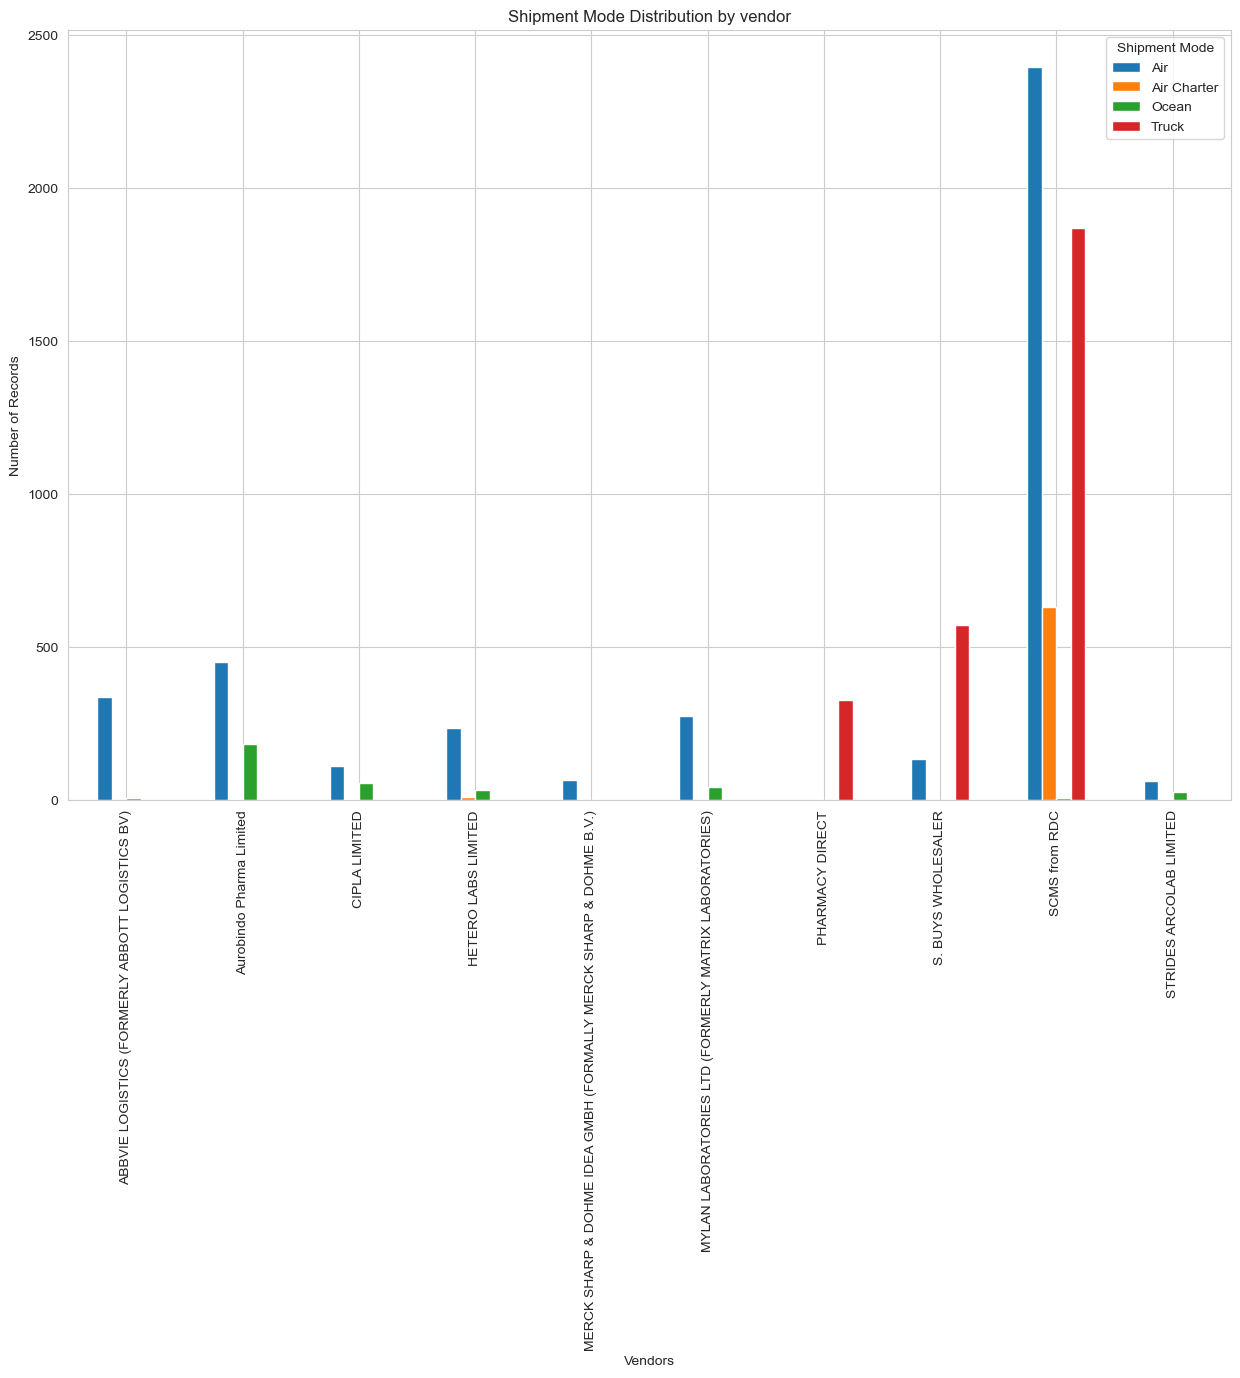

In [211]:
#  bar plot for 'Shipment Mode' by 'Vendor'
vendor_shipment_mode = pd.crosstab(df_top_vendor['Vendor'], df_top_vendor['Shipment Mode'])
vendor_shipment_mode.plot(kind='bar', figsize=(15,10))
plt.title('Shipment Mode Distribution by vendor')
plt.ylabel('Number of Records')
plt.xlabel('Vendors')
plt.xticks(rotation=90)
#plt.savefig('pic')
plt.show()

### Key Observations:
**Dominance of Air:**
* Air: The most commonly used mode by most vendors, suggesting a preference for speed and efficiency.

**Limited Use of Other Modes:**
* Truck: While used by some vendors, its usage is significantly lower than air.
* Ocean and Air Charter: These modes appear to be used sparingly or not at all by most vendors.

**Vendor-Specific Variations:**
* LOGISTICS BV and PHARMACY DIRECT: These vendors exhibit a higher volume of shipments, primarily using air transportation.
* CIPLA LIMITED, LABS LIMITED, and MERCK & DOHME B.V.: These vendors have lower overall shipment volumes, with air as the dominant mode.
* Other vendors: Show minimal shipment activity across all modes.

In [213]:
top_items=df_top_vendor['Item Description'].value_counts().head(10).index
df_top_item=df_top_vendor[df_top_vendor['Item Description'].isin(top_items)]


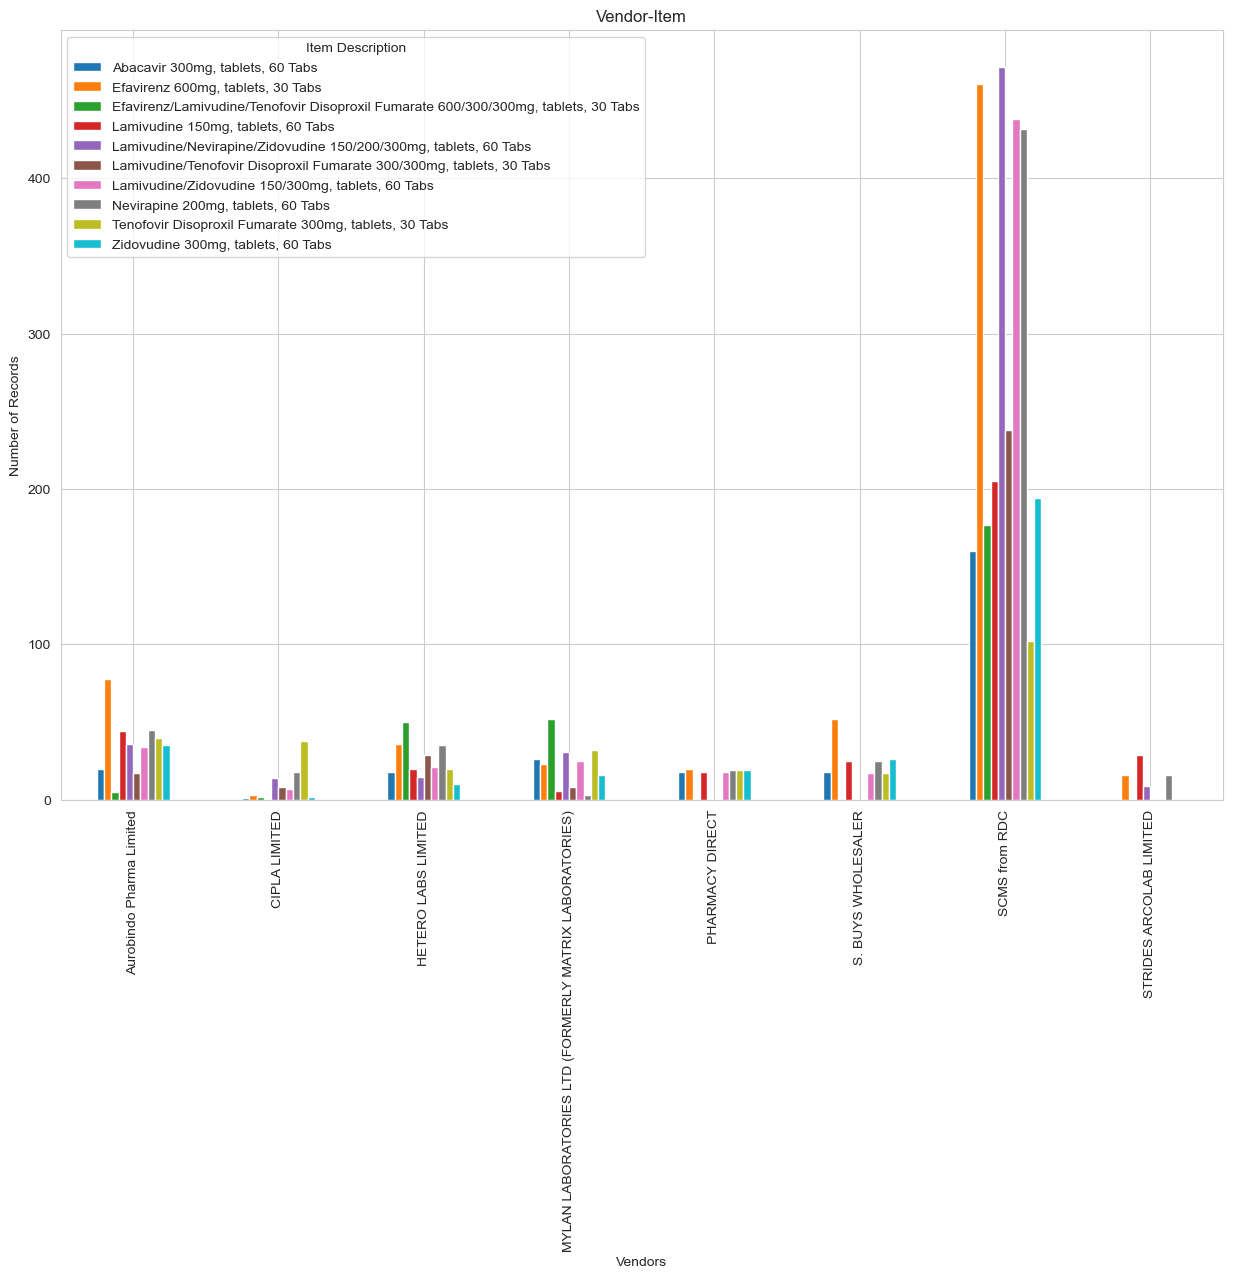

In [214]:
#  bar plot for 'Shipment Mode' by 'Vendor'
vendor_items = pd.crosstab(df_top_item['Vendor'], df_top_item['Item Description'])
vendor_items.plot(kind='bar', figsize=(15,10))
plt.title('Vendor-Item')
plt.ylabel('Number of Records')
plt.xlabel('Vendors')
plt.xticks(rotation=90)
#plt.savefig('pic')
plt.show()

#### Key Findings
**High Volume Items:**
* Certain items like "Efavirenz 600mg, tablets, 30 Tabs," "Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs," and "Lamivudine/Tenofovir Disoproxil Fumarate 300/300mg, tablets, 30 Tabs" have the highest number of records across multiple vendors.
* Particularly, "Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs" stands out with significantly higher records from the vendor labeled "SCMS from RDC."

**Vendor Comparison:**

Vendors such as "SCMS from RDC" and "WHOLESALER" have higher volumes of records compared to others like "LABS LIMITED" and "PHARMA LIMITED," which show lower records across all items.
The vendor "CMS from RDC" dominates in the number of records for most items, indicating a possibly higher distribution or demand from this vendor.
Item Distribution Across Vendors:

The distribution of records across vendors for each item shows variability. Some items like "Zidovudine 300mg, tablets, 60 Tabs" are less distributed across multiple vendors, appearing primarily under specific ones like "CMS from RDC."
Niche Items:

Items like "Nevirapine 200mg, tablets, 60 Tabs" and "Zidovudine 300mg, tablets, 30 Tabs" have a lower number of records and appear only with specific vendors, indicating they might be less commonly distributed or required.
The chart suggests significant differences in the volume of records between vendors, with certain vendors like "CMS from RDC" having a much larger share of records for many items, particularly for high-volume items.

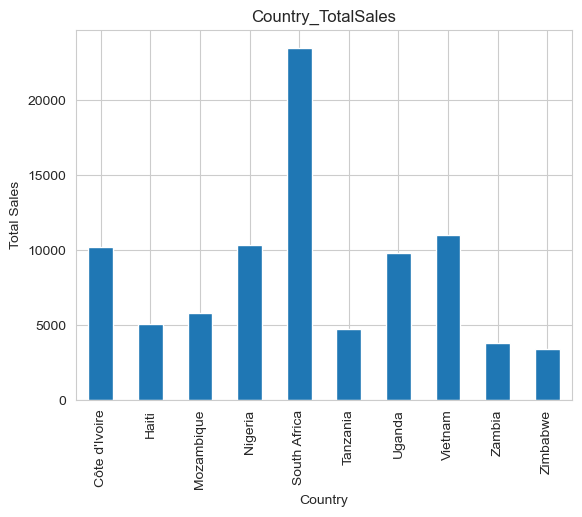

In [216]:
df_top_country.groupby(['Country'])['Pack Price'].sum().plot.bar()
plt.ylabel('Total Sales')
plt.title('Country_TotalSales')
plt.xticks(rotation=90)
plt.show()


### Key Findings and Analysis

1. **Dominance of Africa**: 
   - The bar chart indicates that "Africa" has the highest total sales, significantly surpassing all other countries listed. This suggests a strong market presence or demand within the African region.

2. **Comparative Sales**:
   - Following Africa, **Nigeria** shows notable sales, although still much lower than Africa's total. This emphasizes Nigeria's importance as a significant market.
   - Other countries like **Ivory Coast**, **Haiti**, and **Mozambique** have moderate sales figures, indicating potential growth areas.

3. **Lower Sales in Other Regions**:
   - Countries such as **Uganda**, **Tanzania**, and **Zambia** have lower sales, suggesting either lesser market penetration or possibly lower demand for the products/services being analyzed.

4. **Sales Distribution**:
   - The sales distribution appears uneven, with a few countries contributing significantly to the total, highlighting a possible concentration of sales in specific markets.

5. **Strategic Implications**:
   - The findings suggest potential areas for strategic investment and marketing efforts, particularly in regions with lower sales but potential for growth.
   - There may be opportunities to analyze the factors contributing to higher sales in Africa to replicate that success innderperforming areas.

In [218]:
agg_data

,Country,Vendor,Total_Sales
0,Côte d'Ivoire,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),1250.99
1,Côte d'Ivoire,Aurobindo Pharma Limited,171.59
2,Côte d'Ivoire,BRISTOL-MYERS SQUIBB,171.28
3,Côte d'Ivoire,CIPLA LIMITED,1.85
4,Côte d'Ivoire,GLAXOSMITHKLINE EXPORT LIMITED,107.42
...,...,...,...
121,Zimbabwe,LAWRENCE LABORATORIES (SUBSIDIARY OF BRISTOL M...,28.00
122,Zimbabwe,MICRO LABS LIMITED,6.50
123,Zimbabwe,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,26.18
124,Zimbabwe,SCMS from RDC,2393.40


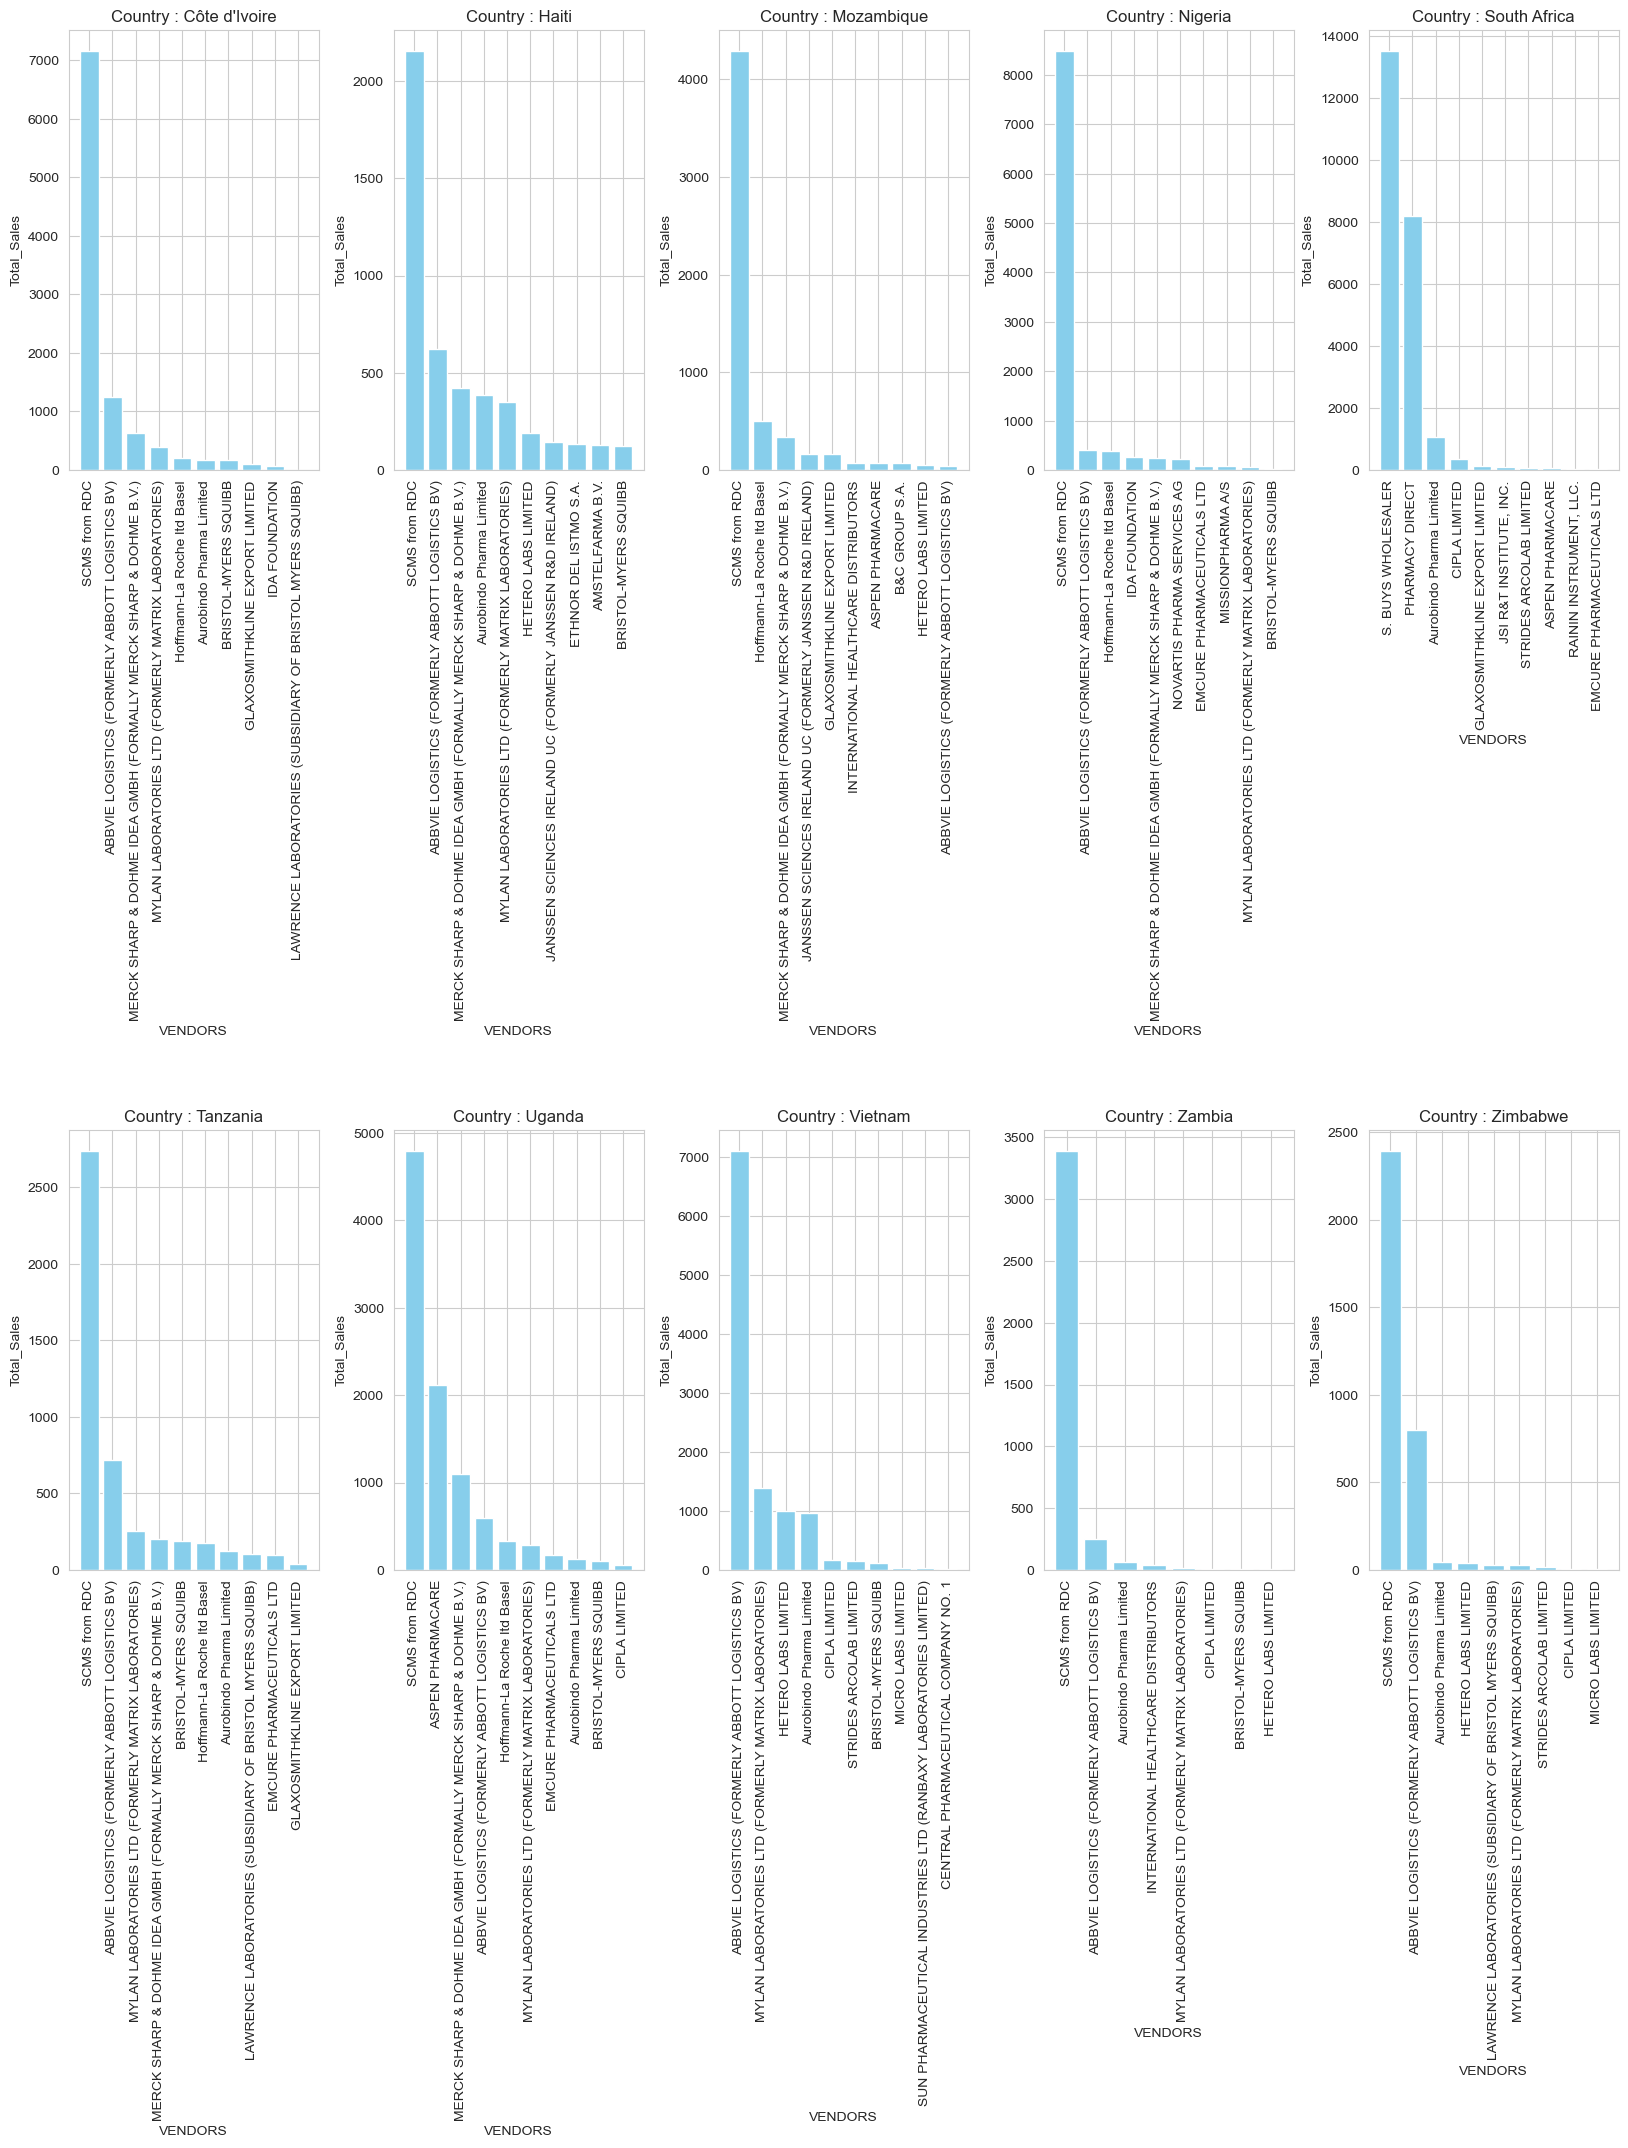

In [219]:
# Create graph for the  top 10 countries
agg_data_1 = df_top_country.groupby(['Country', 'Vendor']).agg(Total_Sales=('Pack Price','sum')).reset_index()
# Get top 10 vendors for each country
agg_data_2 = agg_data_1.groupby('Country').apply(lambda x: x.nlargest(10, 'Total_Sales')).reset_index(drop=True)
#plot
# Get the top 10 countries from the aggregated data
top_countries = agg_data_2['Country'].unique()[:10]
plt.figure(figsize=(20,20))
count=1
# Create individual bar plots for the top countries
for country in top_countries:
    country_data = agg_data_2[agg_data_2['Country'] == country]
    #subplot
    plt.subplot(2,5,count)
    count+=1
    # Create a bar plot for each country
    plt.bar(country_data['Vendor'], country_data['Total_Sales'], color='skyblue')
    plt.title(f'Country : {country}')
    plt.xlabel('VENDORS',ha='center')
    plt.ylabel('Total_Sales')
    plt.xticks(rotation=90)
    
# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=1.5)  # Adjust as needed
plt.savefig('2')
plt.show()   
   

### Key Findings and Analysis (Including Vendor Names)

1. **Sales Distribution**:
   - The charts illustrate a stark contrast in total sales across different countries, with **Nigeria** and **South Africa** leading. These countries have vendors with significantly higher sales, indicating robust market activity.

2. **Vendor Dominance**:
   - In **Nigeria**, specific vendors like **SCMS from RDC** and **ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)** account for a large portion of total sales, suggesting they hold a strong market position.
   - Similarly, in **South Africa**, vendors such as **S. BUYS WHOLESALER** and **PHARMACY DIRECT** show high sales figures, indicating they are key players in this market.

3. **Underperforming Markets**:
   - Countries such as **Tanzania**, **Uganda**, and **Zimbabwe** show lower sales overall. The vendor sales in these regions, like **Aurobindo Pharma Limited** and othera are minimal, highlighting a need for improved market strategies.

4. **Concentration of Sales**:
   - Many countries reveal a concentration of sales among a few vendors, suggesting that the market may be heavily reliant on these key players. For instance, in **Mozambique**, a limited number of vendors dominate the sales landscape.

5. **Opportunities for Growth**:
   - The lower sales figures in countries like **Zambia** and **Tanzania** indicate potential growth areas. Targeting these markets with tailored strategies, possibly focusing on local vendor partnerships, could enhance sales performance.

6. **Vendor-Specific Insights**:
   - Analyzing high-performing vendors can provide insights into their strategies, which may include unique marketing approaches or product offerings that resonate well with local consumers.

### Conclusion

The inclusion of vendor names in the analysis highlights the critical role that specific vendors play in driving sales in their respective markets. Understanding the dynamics of these vendors, particularly in high-performing regions, can inform strategies for expansion and improvement in underperforming areas. Businesses should consider leveraging successful vendor practices and exploring collaborative opportunities to maximize market potential.